# Problem Statement : prediction on insurance . is it have_insurance or not_have_insurance based on age feature by logistic regression

## 1.Import Libraries

In [110]:
# Data Science Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Machine Learning Library

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

## 2.Data Collection

In [111]:
df = pd.read_excel('E:ML_Datasets/insurance_simple.xlsx')

In [112]:
df

,age,have_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,0
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


## Here we check data is balanced or not so for that reason we calculate count of category or count of values

In [113]:
df['have_insurance'].value_counts()

0    9
1    6
Name: have_insurance, dtype: int64

## count plot for check data balance

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='have_insurance', ylabel='count'>

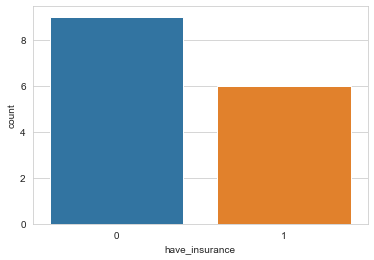

In [114]:
sns.countplot(df['have_insurance'])

###  Here data is not balance 0 category has count greater than category 1 . so here we try to balancing data. here we have two options oversampling and undersampling . Here our dataset is low . so we go with oversampling . means increase copy of minority class . so 1 category has count less as compare to 0th category

In [115]:
from sklearn.utils import resample

df_minority = df[df['have_insurance']==1]
df_majority = df[df['have_insurance']==0]

df_minority_upsample = resample(df_minority , replace = True ,n_samples = 9 , random_state = 42)

df_upsample = pd.concat([df_minority_upsample , df_majority])

In [116]:
df_upsample

,age,have_insurance
8,62,1
9,61,1
7,60,1
9,61,1
9,61,1
5,56,1
7,60,1
7,60,1
7,60,1
0,22,0


C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='have_insurance', ylabel='count'>

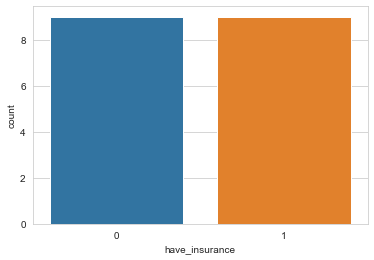

In [117]:
sns.countplot(df_upsample['have_insurance'])

## Divide data into dependent and independent variable

In [118]:
x = df_upsample.iloc[:,0]
y = df_upsample.iloc[:,-1]

In [119]:
x.head(2)

8    62
9    61
Name: age, dtype: int64

In [120]:
y.head(2)

8    1
9    1
Name: have_insurance, dtype: int64

In [121]:
x_train ,x_test ,y_train ,y_test = train_test_split(x , y ,test_size =0.2 , random_state = 42)

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
model = LogisticRegression()

In [124]:
x_train = pd.DataFrame(x_train)

In [125]:
x_test = pd.DataFrame(x_test)

In [126]:
y_train = pd.DataFrame(y_train)

In [127]:
y_test = pd.DataFrame(y_test)

In [128]:
model.fit(x_train ,y_train)

C:\Users\Pritam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [129]:
y_pred = model.predict(x_test)

In [130]:
y_pred =pd.DataFrame(y_pred)

In [131]:
y_pred

,0
0,1
1,1
2,1
3,0


In [132]:
confusion_matrix = confusion_matrix(y_test ,y_pred)

In [133]:
confusion_matrix

array([[0, 0],
       [1, 3]], dtype=int64)

In [134]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.75      0.86         4

    accuracy                           0.75         4
   macro avg       0.50      0.38      0.43         4
weighted avg       1.00      0.75      0.86         4



C:\Users\Pritam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pritam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pritam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
